In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from scipy.io import loadmat
from scipy.signal import stft
import pywt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

## PHM2012 Data Access

In [3]:
filePath = '../pythonScripts/PHM2012/phm-ieee-2012-data-challenge-dataset/'

def readfile_h(path):
    files = os.listdir(path)
    files = list(filter(lambda x:x[0:4]=='acc_', files))
    #fix order problem
    files.sort(key=lambda x:int(x[5:-4]))
    print(files)
    rowdata_v = []
    rowdata_h = []
    
    for file in files:
        info = path+file
        data = np.loadtxt(open(info, "rb"), delimiter=',', skiprows=0)
        rowdata_h = np.hstack((rowdata_h, data[:,4]))
        rowdata_v = np.hstack((rowdata_v, data[:,5]))

    return rowdata_h, rowdata_v

In [4]:
fullLife1_3_h, fullLife1_3_v = readfile_h(filePath+'Full_Test_Set/Bearing1_3/')

['acc_00001.csv', 'acc_00002.csv', 'acc_00003.csv', 'acc_00004.csv', 'acc_00005.csv', 'acc_00006.csv', 'acc_00007.csv', 'acc_00008.csv', 'acc_00009.csv', 'acc_00010.csv', 'acc_00011.csv', 'acc_00012.csv', 'acc_00013.csv', 'acc_00014.csv', 'acc_00015.csv', 'acc_00016.csv', 'acc_00017.csv', 'acc_00018.csv', 'acc_00019.csv', 'acc_00020.csv', 'acc_00021.csv', 'acc_00022.csv', 'acc_00023.csv', 'acc_00024.csv', 'acc_00025.csv', 'acc_00026.csv', 'acc_00027.csv', 'acc_00028.csv', 'acc_00029.csv', 'acc_00030.csv', 'acc_00031.csv', 'acc_00032.csv', 'acc_00033.csv', 'acc_00034.csv', 'acc_00035.csv', 'acc_00036.csv', 'acc_00037.csv', 'acc_00038.csv', 'acc_00039.csv', 'acc_00040.csv', 'acc_00041.csv', 'acc_00042.csv', 'acc_00043.csv', 'acc_00044.csv', 'acc_00045.csv', 'acc_00046.csv', 'acc_00047.csv', 'acc_00048.csv', 'acc_00049.csv', 'acc_00050.csv', 'acc_00051.csv', 'acc_00052.csv', 'acc_00053.csv', 'acc_00054.csv', 'acc_00055.csv', 'acc_00056.csv', 'acc_00057.csv', 'acc_00058.csv', 'acc_00059.cs

<function matplotlib.pyplot.show(close=None, block=None)>

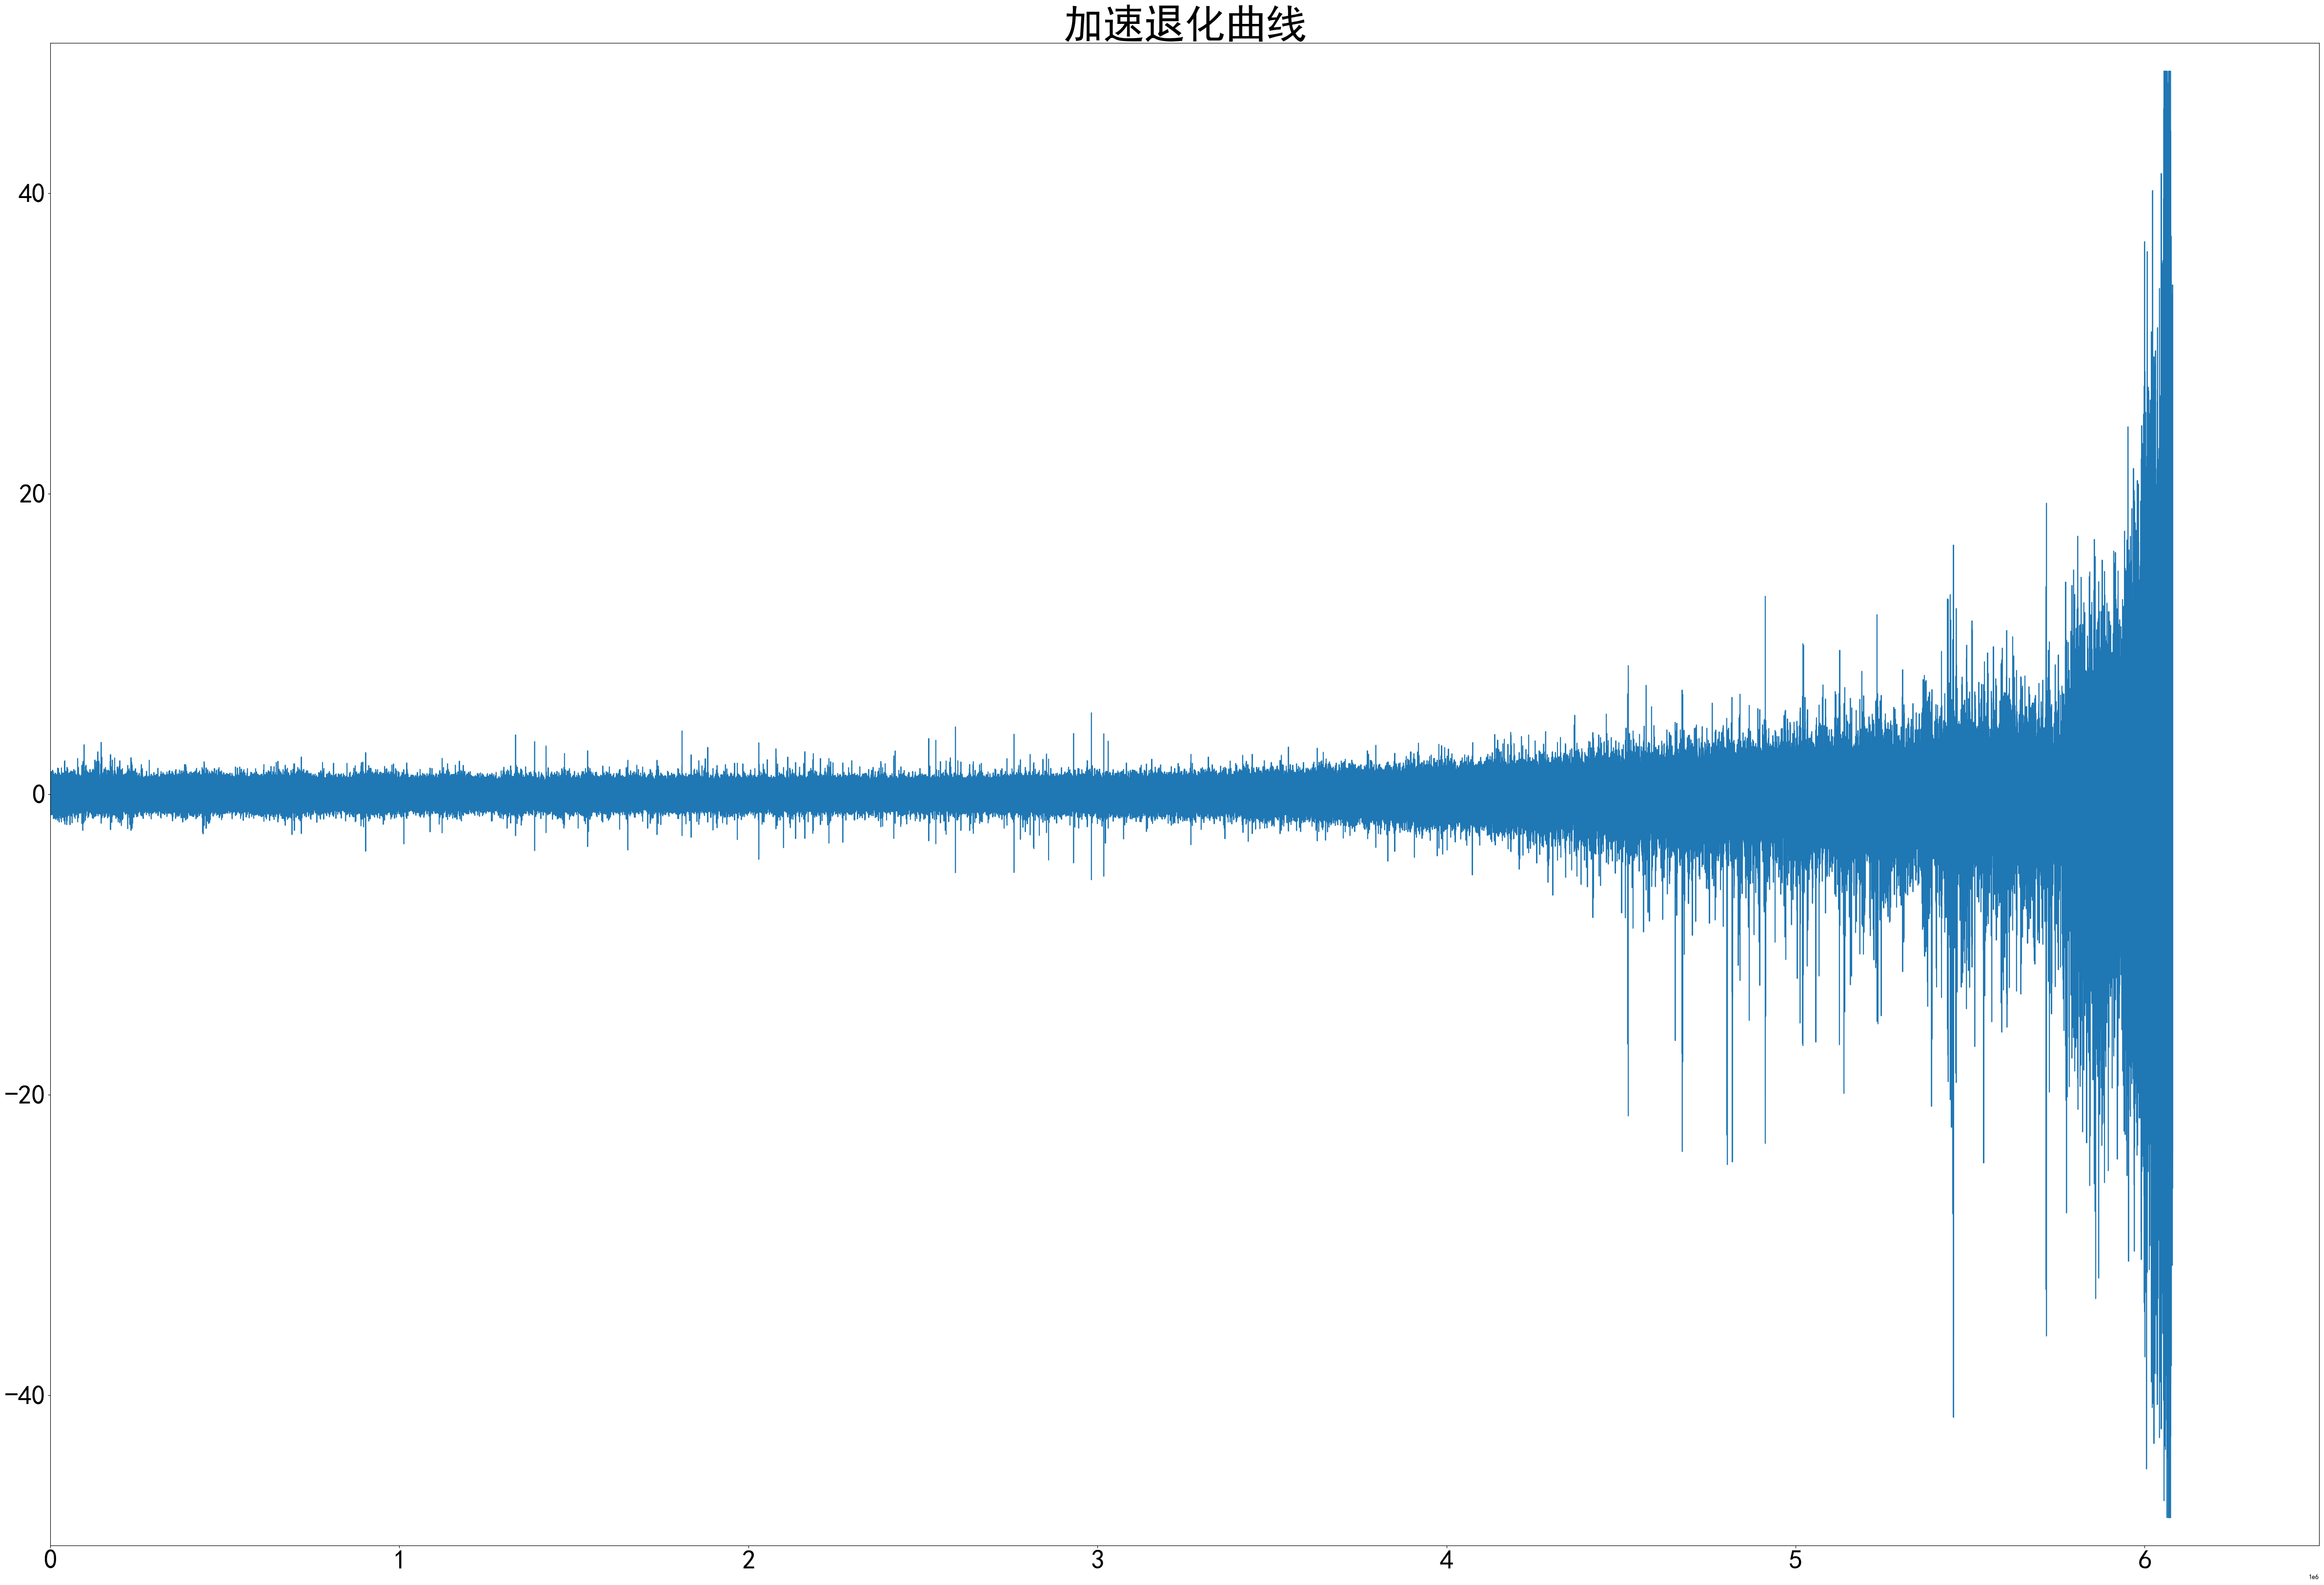

In [5]:
plt.figure(figsize=(60,40))
plt.plot(fullLife1_3_h)
plt.title('加速退化曲线', fontsize=60)
plt.tick_params(axis='both', which='major', labelsize=40)
plt.xlim([0,6500000])
plt.ylim([-50, 50])
plt.show

## CWRT Data Access

In [8]:
CWRT_normal = loadmat('../pythonScripts/CWRT/Normal Baseline Data/97.mat')
CWRT_InnerRace = loadmat('../pythonScripts/CWRT/12k Drive End Bearing Fault Data/105.mat')
CWRT_Ball = loadmat('../pythonScripts/CWRT/12k Drive End Bearing Fault Data/118.mat')
CWRT_OuterRace = loadmat('../pythonScripts/CWRT/12k Drive End Bearing Fault Data/130.mat')
print(CWRT_normal)
print(CWRT_InnerRace)
print(CWRT_Ball)
print(CWRT_OuterRace)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 15:28:20 2000', '__version__': '1.0', '__globals__': [], 'X097_DE_time': array([[ 0.05319692],
       [ 0.08866154],
       [ 0.09971815],
       ...,
       [-0.03463015],
       [ 0.01668923],
       [ 0.04693846]]), 'X097_FE_time': array([[0.14566727],
       [0.09779636],
       [0.05485636],
       ...,
       [0.14053091],
       [0.09553636],
       [0.09019455]]), 'X097RPM': array([[1796]], dtype=uint16)}
{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 13:49:59 2000', '__version__': '1.0', '__globals__': [], 'X105_DE_time': array([[-0.08300435],
       [-0.19573433],
       [ 0.23341928],
       ...,
       [-0.31642363],
       [-0.06367457],
       [ 0.26736822]]), 'X105_FE_time': array([[-0.40207455],
       [-0.00472545],
       [-0.10663091],
       ...,
       [ 0.31598909],
       [ 0.35091636],
       [ 0.03307818]]), 'X105_BA_time': array([[ 0.06466148],
       [

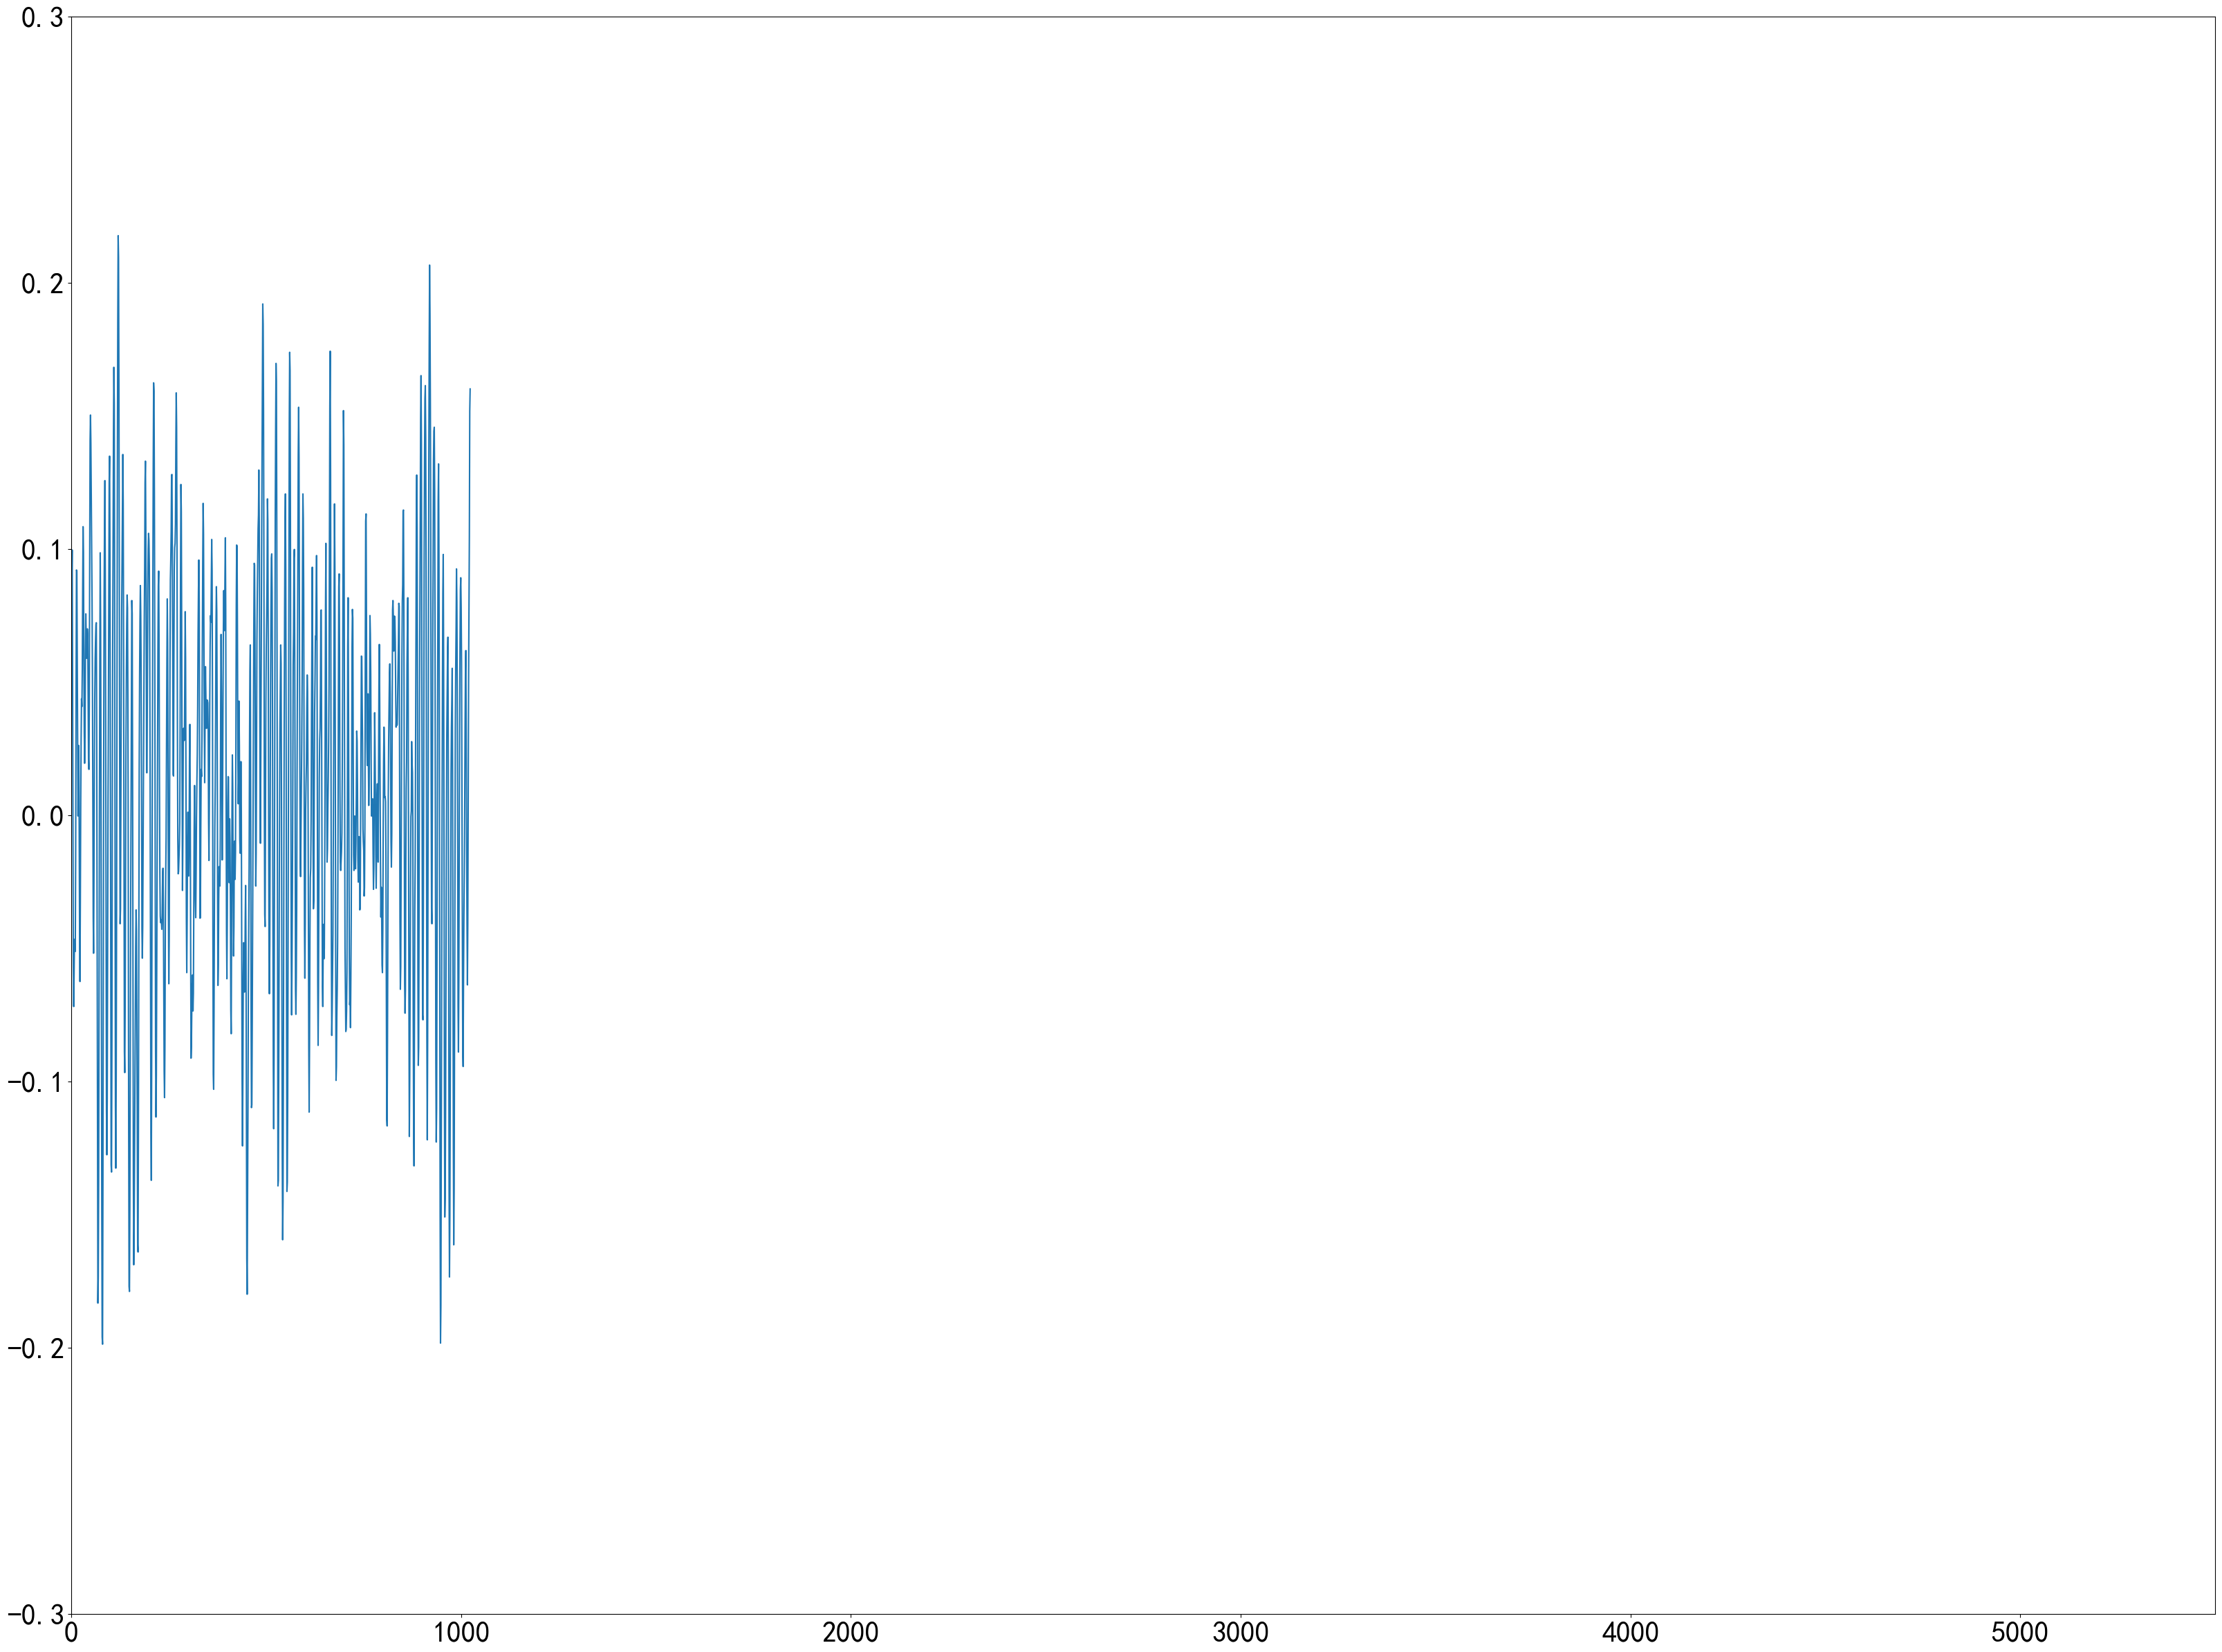

In [17]:
data_list_normal = CWRT_normal['X097_DE_time'].reshape(-1)

data_list_normal = data_list_normal[0:1024]

plt.figure(figsize=(40,30))
plt.plot(data_list_normal)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.xlim([0,5500])
plt.ylim([-0.3, 0.3])
plt.show()

In [28]:
sampling_rate = 1024

totalscal = 128

wavename = 'cmor100-1'

fc = pywt.central_frequency(wavename)
cparam = 2 * fc * totalscal
scales = cparam / np.arange(totalscal, 0, -1)

coefficients, frequencies = pywt.cwt(data_list_normal, scales, wavename, sampling_period=(0.002))

amp = abs(coefficients)

t = np.linspace(0, 1.0/sampling_rate, sampling_rate, endpoint=False)

plt.figure(figsize=(40,30), dpi=300)
plt.contourf(t, frequencies, amp, cmap='jet')
plt.tick_params(axis='both', which='major', labelsize=30)
plt.show()
